<a href="https://colab.research.google.com/github/ScienceMoo/DNA_structure_ML/blob/main/Softmax_without_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import scipy.io
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.special import softmax
import matplotlib.pyplot as plt
%matplotlib inline

import math
import seaborn; seaborn.set() # Plot styling
from seaborn import heatmap

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# actual PWM (you need this later just to compare)
actualPWM = np.array([[0.0540, 0.3180, 0.5660, 0.0620],
    [0.0240, 0.6460, 0.0240, 0.3060],
    [0.0680, 0.0420, 0.7920, 0.0980],
    [0.0420, 0.7900, 0.0620, 0.1060],
    [     0, 0.9940,      0, 0.0060],
    [0.2620, 0.6660, 0.0460, 0.0260],
    [0.0040, 0.6180, 0.0020, 0.3760],
    [     0, 0.9980, 0.0020,      0],
    [0.0320, 0.0640, 0.0080, 0.8960],
    [0.2660, 0.0900, 0.5640, 0.0800],
    [0.0200, 0.3440, 0.6200, 0.0160],
    [0.0800, 0.1940, 0.0440, 0.6820],
    [0.0100, 0.0020, 0.9760, 0.0120],
    [0.0260, 0.0660, 0.8400, 0.0680],
    [0.1260, 0.5940, 0.0740, 0.2060]])

# Read data

In [75]:
file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "CTCF_sequences.mat"
file_path = file_folder + "/" + file_name

mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)

sequences = mat['sequences']
sequences = [word[2:33] for word_array in sequences for word in word_array[0]]
sequences = np.array(sequences)
num_sample, seq_length = sequences.shape[0], sequences.shape[1]
print("sequences.shape =", sequences.shape)
print("num_sample =", num_sample)
print("seq_length =", seq_length)
print("")
print("sequences =", sequences[:5])

### Load false binding sequences
file_folder = "/content/drive/MyDrive/Colab Notebooks"
file_name = "false_sequences.mat"
file_path = file_folder + "/" + file_name
mat = scipy.io.loadmat(file_path, chars_as_strings=1, matlab_compatible=1)
false_sequences = mat['false_sequences']

false_sequences = [word[2:33] for word_array in false_sequences for word in word_array[0]]
false_sequences = np.array(false_sequences)

num_false_seq = false_sequences.shape[0]
print("false_sequences.shape =", false_sequences.shape)
print("num_false_seq =", num_false_seq)
print("seq_length =", seq_length)
print("")
print("false_sequences =", false_sequences[:5])

sequences.shape = (158004, 31)
num_sample = 158004
seq_length = 31

sequences = [['T' 'G' 'G' 'C' 'A' 'C' 'A' 'A' 'A' 'A' 'C' 'C' 'C' 'C' 'T' 'C' 'T' 'G'
  'C' 'T' 'G' 'G' 'C' 'T' 'C' 'G' 'T' 'G' 'T' 'G' 'T']
 ['T' 'C' 'C' 'T' 'T' 'G' 'A' 'A' 'G' 'C' 'G' 'C' 'C' 'C' 'C' 'C' 'A' 'A'
  'G' 'G' 'G' 'C' 'A' 'T' 'C' 'T' 'T' 'C' 'T' 'C' 'A']
 ['T' 'T' 'C' 'T' 'C' 'T' 'G' 'T' 'G' 'T' 'G' 'G' 'C' 'A' 'C' 'C' 'A' 'G'
  'G' 'T' 'G' 'G' 'C' 'A' 'G' 'C' 'A' 'G' 'A' 'G' 'G']
 ['G' 'A' 'C' 'C' 'T' 'C' 'T' 'G' 'C' 'T' 'G' 'C' 'C' 'A' 'C' 'C' 'T' 'G'
  'G' 'T' 'G' 'C' 'C' 'A' 'C' 'A' 'C' 'A' 'G' 'A' 'G']
 ['T' 'T' 'G' 'C' 'C' 'T' 'T' 'G' 'C' 'T' 'G' 'A' 'C' 'C' 'T' 'C' 'T' 'G'
  'C' 'T' 'G' 'C' 'C' 'A' 'C' 'C' 'T' 'G' 'G' 'T' 'G']]
false_sequences.shape = (160135, 31)
num_false_seq = 160135
seq_length = 31

false_sequences = [['T' 'C' 'C' 'T' 'T' 'G' 'A' 'A' 'G' 'C' 'A' 'C' 'C' 'C' 'C' 'C' 'A' 'A'
  'G' 'G' 'G' 'C' 'A' 'T' 'C' 'T' 'T' 'C' 'T' 'C' 'A']
 ['T' 'C' 'C' 'T' 'T' 'G' 'A' 'A' 'G' 'C' 'G' 'C' 

In [76]:
# Clean the data
inds = []
for idx, sequence in enumerate(sequences):
  if 'N' in sequence:
    inds.append(idx)

sequences = np.delete(sequences, inds, axis=0)

num_sample, seq_length = sequences.shape[0], sequences.shape[1]

print("num_sample =", num_sample)
print("seq_length =", seq_length)

print("sequences.shape =", sequences.shape)
num_sample, seq_length = sequences.shape[0], sequences.shape[1]
num_sample, seq_length = sequences.shape[0], sequences.shape[1]
print("num_sample =", num_sample)
print("seq_length =", seq_length)

inds = []
for idx, sequence in enumerate(false_sequences):
  if 'N' in sequence:
    inds.append(idx)

false_sequences = np.delete(false_sequences, inds, axis=0)
false_sequences = false_sequences[0:157999]
num_false_seq = false_sequences.shape[0]
print("num_false_seq =", num_false_seq)

num_sample = 158004
seq_length = 31
sequences.shape = (158004, 31)
num_sample = 158004
seq_length = 31
num_false_seq = 157999


# Prepare data

In [77]:
# one-hot encoding
X = np.zeros(list(sequences.shape) + [4])
false_X = np.zeros(list(false_sequences.shape) + [4])

base_dict = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

for row in range(num_sample):
    for col in range(seq_length):
        X[row,col,base_dict[sequences[row,col]]] = 1

for row in range(num_false_seq):
    for col in range(seq_length):
        false_X[row,col,base_dict[false_sequences[row,col]]] = 1

X = np.vstack((X, false_X))
y = np.vstack((np.transpose(np.repeat([[0], [1]], num_sample, axis=1)), np.transpose(np.repeat([[1], [0]], num_false_seq, axis=1))))
print('Training set shape: {}'.format(X.shape))
print('Training set label shape: {}'.format(y.shape))
print('\nOne-hot encoding looks like:\n {}'.format(X[0,0:10,:]))

print('\nTarget looks like:\n {}'.format(y[0]))

Training set shape: (316003, 31, 4)
Training set label shape: (316003, 2)

One-hot encoding looks like:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

Target looks like:
 [0 1]


In [78]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05)

# Deep Learning

In [84]:
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.layers.pooling import MaxPooling1D
from keras.optimizers import SGD
import keras

# define the model
model = Sequential()
model.add(Conv1D(128, 25, padding='same', activation='relu', input_shape=(seq_length, 4)))
# model.add(Conv1D(32, 15, padding='same', activation='relu'))
#sanity check for dimensions
print('Shape of the output of first layer: {}'.format(model.predict_on_batch(X[0:32,:,:]).shape))
# model.add(MaxPooling1D(2))

# model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# sgd = SGD(lr=0.0001, decay=1e-8, momentum=0.9, nesterov=True)
sgd = SGD(lr=0.0003, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X, y, validation_split=0.2, epochs=80, batch_size=100)  # starts training
model.evaluate(X_test, y_test)

model.summary()

Shape of the output of first layer: (32, 31, 128)
Epoch 1/80
2402/2402 [==============================] - 25s 10ms/step - loss: 0.5501 - accuracy: 0.7604 - val_loss: 0.4397 - val_accuracy: 0.8330
Epoch 2/80
2402/2402 [==============================] - 24s 10ms/step - loss: 0.3635 - accuracy: 0.8764 - val_loss: 0.3014 - val_accuracy: 0.9124
Epoch 3/80
2402/2402 [==============================] - 24s 10ms/step - loss: 0.2606 - accuracy: 0.9309 - val_loss: 0.2302 - val_accuracy: 0.9439
Epoch 4/80
2402/2402 [==============================] - 24s 10ms/step - loss: 0.2088 - accuracy: 0.9501 - val_loss: 0.1938 - val_accuracy: 0.9545
Epoch 5/80
2402/2402 [==============================] - 25s 10ms/step - loss: 0.1819 - accuracy: 0.9575 - val_loss: 0.1743 - val_accuracy: 0.9585
Epoch 6/80
2402/2402 [==============================] - 25s 11ms/step - loss: 0.1665 - accuracy: 0.9612 - val_loss: 0.1626 - val_accuracy: 0.9618
Epoch 7/80
2402/2402 [==============================] - 24s 10ms/step - lo

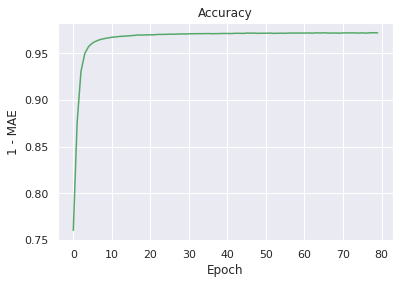

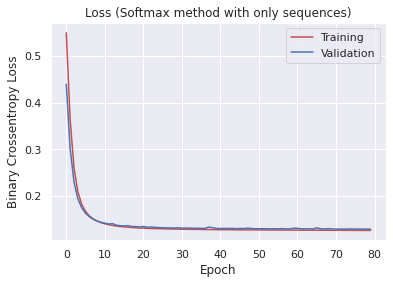

In [93]:
plt.plot(hist.epoch, hist.history['accuracy'], 'g')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("1 - MAE")
plt.show()

plt.plot(hist.epoch, hist.history['loss'], 'r', label="Training")
plt.plot(hist.epoch, hist.history['val_loss'], 'b', label="Validation")
plt.title("Loss (Softmax method with only sequences)")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.legend()
plt.show()

Convolution parameter shape: (25, 4, 128)
[[0.01267088 0.01491073 0.01559371 0.01394222 0.01713988 0.01972724
  0.0174704  0.0240351  0.02560086 0.01454405 0.01716694 0.02457198
  0.02269874 0.02078402 0.01975087 0.0184167  0.01691052 0.01908008
  0.01478849 0.02534118 0.01952842 0.01682503 0.01639056 0.01384594
  0.01321986]
 [0.00937741 0.0134004  0.0106211  0.01424202 0.01374446 0.00625644
  0.01428937 0.01277363 0.00888231 0.01829926 0.01424713 0.01007671
  0.02137502 0.01887424 0.02075609 0.02020382 0.02234823 0.0238426
  0.01757086 0.01000109 0.00808193 0.01329057 0.00308588 0.00729047
  0.01087871]
 [0.0189071  0.01324526 0.02164342 0.01506415 0.01531578 0.02537526
  0.01852373 0.01778203 0.01778356 0.01589418 0.02998178 0.02079567
  0.02556812 0.0172368  0.0150668  0.01986872 0.0192866  0.01360057
  0.01589145 0.01064766 0.02165505 0.02255971 0.01663064 0.02058967
  0.01616113]
 [0.01240399 0.01363512 0.00936377 0.01135587 0.01672973 0.01005828
  0.0191312  0.01193652 0.0167073

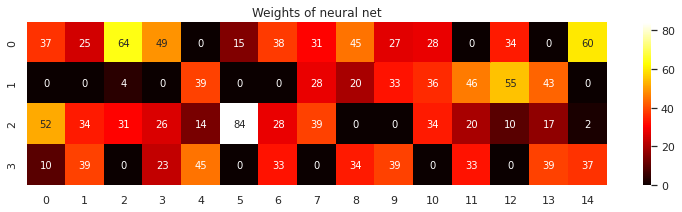

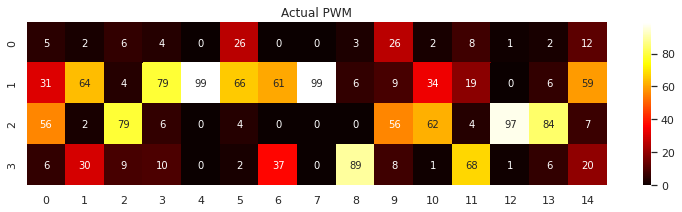

In [89]:
def my_softmax(row):
  if min(row) != 0:
    row = row - min(row)
  return row / sum(row)

#have a look at the filter
convlayer = model.layers[0]
weights = convlayer.get_weights()[0].squeeze()
print('Convolution parameter shape: {}'.format(weights.shape))
# weights = np.apply_along_axis(my_softmax, 1, weights)
weights = np.mean(np.transpose(weights), 0)
print(weights)
weights = np.transpose(weights)
weights = np.apply_along_axis(my_softmax, 1, weights)

weights = weights * 100
weights = weights.astype(int)

fig=plt.figure(figsize=(13, 3))
heatmap(np.transpose(weights)[:, 5:-5],  annot=True, fmt="d", cmap="hot")
plt.title("Weights of neural net")
plt.show()


fig=plt.figure(figsize=(13, 3))
heatmap(np.transpose((actualPWM * 100).astype(int)), annot=True, fmt="d", cmap="hot")
plt.title("Actual PWM")
plt.show()

In [43]:
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmax(actualPWM[i,:])] for i in range(actualPWM.shape[0])])  

'GCGCCCCCTGGTGGC'

In [44]:
# predict highest strength sequence
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmax(weights[i,:])] for i in range(8, weights.shape[0] - 8)])  

'ACTGGCTGGCGCCCC'

In [ ]:
# predict lowest strength sequence
num2seq = ['A','C','G','T']
''.join([num2seq[np.argmin(weights[i,:])] for i in range(weights.shape[0])])

'ATATGAGATCCAGAA'

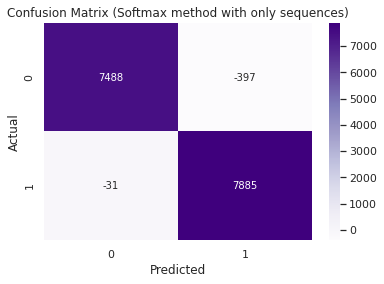

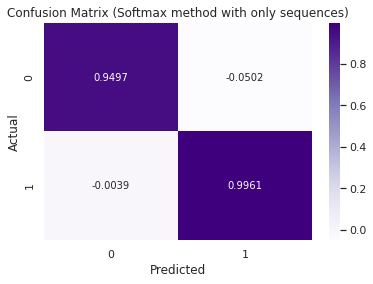

In [92]:
# Test the model
pred = model.predict(X_test)

y_actual = np.array([np.argmax(i) for i in y_test])
y_pred = np.array([np.argmax(i) for i in pred])

true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

for i in range(y_actual.shape[0]):
  if y_pred[i] == 1 and y_actual[i] == 1:
    true_positives += 1
  elif y_pred[i] == 0 and y_actual[i] == 1:
    false_negatives += 1
  elif y_pred[i] == 1 and y_actual[i] == 0:
    false_positives += 1
  elif y_pred[i] == 0 and y_actual[i] == 0:
    true_negatives += 1

confusion = [[true_negatives, false_positives], [false_negatives, true_positives]]
confusion = np.array(confusion)
confusion = - confusion
np.fill_diagonal(confusion, - confusion.diagonal())
heatmap(confusion, annot=True, fmt="d", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Softmax method with only sequences)')
plt.show()


total_positive = (true_positives + false_negatives)
total_negative = (true_negatives + false_positives)

true_positives = true_positives / total_positive
false_positives = false_positives / total_positive
true_negatives = true_negatives / total_negative
false_negatives = false_negatives / total_negative

confusion = [[true_negatives, false_positives], [false_negatives, true_positives]]
confusion = np.array(confusion)
confusion = - confusion
np.fill_diagonal(confusion, - confusion.diagonal())
heatmap(confusion, annot=True, fmt=".4f", cmap="Purples")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Softmax method with only sequences)')
plt.show()